In [ ]:
#利用python实现聚类并画图表示

In [1]:
# -*- coding:utf-8 -*-
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle  ##python自带的迭代器模块


##产生随机数据的中心
centers = [[1, 1], [-1, -1], [1, -1]]
##产生的数据个数
n_samples=10000
##生产数据
#std标准差， random_state随机数种子
#X代表生成的10000个二维数据
#y代表生成的标签，由centers参数确定，这里为0，1，2，3.
X, _ = make_blobs(n_samples=n_samples, centers= centers, cluster_std=0.6,
                  random_state =0)

##带宽，也就是以某个点为核心时的搜索半径
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
##设置均值偏移函数
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
##训练数据
ms.fit(X)
##每个点的标签
labels = ms.labels_
print(labels)
##簇中心的点的集合
cluster_centers = ms.cluster_centers_
print('cluster_centers:',cluster_centers)
##总共的标签分类
#unique：唯一数据的数量
labels_unique = np.unique(labels)
##聚簇的个数，即分类的个数
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)


##绘图
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    ##根据lables中的值是否等于k，重新组成一个True、False的数组
    my_members = labels == k
    cluster_center = cluster_centers[k]
    ##X[my_members, 0] 取出my_members对应位置为True的值的横坐标
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


[1 1 1 ... 2 0 0]
cluster_centers: [[ 0.95599367 -0.91612234]
 [ 0.99957414  0.89275465]
 [-0.95425416 -1.01960393]]
number of estimated clusters : 3


<Figure size 640x480 with 1 Axes>

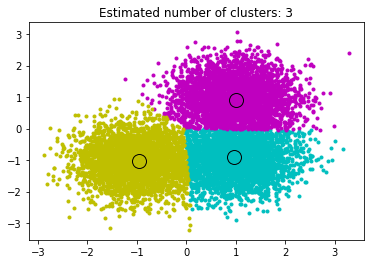

In [3]:
for k, col in zip(range(n_clusters_), colors):
    ##根据lables中的值是否等于k，重新组成一个True、False的数组
    my_members = labels == k
    cluster_center = cluster_centers[k]
    ##X[my_members, 0] 取出my_members对应位置为True的值的横坐标
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
